<a href="https://www.kaggle.com/code/mikedelong/yes-there-are-ugly-pie-charts?scriptVersionId=138720373" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# drop columns that are redundant or almost always NaN
drop_columns = ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I',
                'NOT_RIGHT_OF_WAY_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I',
                'LANE_CNT', 'LOCATION', 
               ]
nrows = 50000 # for performance reasons we take samples
filepath_or_buffer='../input/chicago-car-crash-dataset/Traffic_Crashes_-_Crashes.csv'
df = pd.read_csv(filepath_or_buffer=filepath_or_buffer, 
                 nrows=nrows, 
                 parse_dates=['CRASH_DATE', 'DATE_POLICE_NOTIFIED'], 
                ).drop(columns=drop_columns)

df.sample(n=7).sort_values(by='CRASH_DATE', ascending=False)

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
48048,JG242267,2023-04-29 21:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR TO FRONT,ONE-WAY,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,3.0,0.0,21,7,4,41.991357,-87.697142
20681,JF331284,2022-07-25 17:00:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,17,2,7,41.990008,-87.748377
11655,JE374271,2021-09-15 10:00:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,10,4,9,41.837914,-87.646128
34999,JE334468,2021-08-11 11:45:00,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,1.0,0.0,11,4,8,41.694421,-87.631134
12164,JC233855,2019-04-22 13:15:00,35,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,FIXED OBJECT,UNKNOWN,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,1.0,0.0,13,2,4,41.722440,-87.585743
43471,JC223958,2019-04-14 05:00:00,25,STOP SIGN/FLASHER,NO CONTROLS,CLEAR,DARKNESS,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,5,1,4,41.755974,-87.646752
26257,JC171137,2019-03-01 17:00:00,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,1.0,0.0,17,6,3,41.796146,-87.703778


In [2]:
df.shape

(50000, 38)

We have three quarters of a million rows so we need to be careful when plotting.

In [3]:
df.dtypes

RD_NO                                    object
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_CONTROL_DEVICE                   object
DEVICE_CONDITION                         object
WEATHER_CONDITION                        object
LIGHTING_CONDITION                       object
FIRST_CRASH_TYPE                         object
TRAFFICWAY_TYPE                          object
ALIGNMENT                                object
ROADWAY_SURFACE_COND                     object
ROAD_DEFECT                              object
REPORT_TYPE                              object
CRASH_TYPE                               object
INTERSECTION_RELATED_I                   object
HIT_AND_RUN_I                            object
DAMAGE                                   object
DATE_POLICE_NOTIFIED             datetime64[ns]
PRIM_CONTRIBUTORY_CAUSE                  object
SEC_CONTRIBUTORY_CAUSE                   object
STREET_NO                               

In [4]:
df.isna().sum()

RD_NO                             1460
CRASH_DATE                           0
POSTED_SPEED_LIMIT                   0
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
WEATHER_CONDITION                    0
LIGHTING_CONDITION                   0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
ALIGNMENT                            0
ROADWAY_SURFACE_COND                 0
ROAD_DEFECT                          0
REPORT_TYPE                       2767
CRASH_TYPE                           0
INTERSECTION_RELATED_I           38531
HIT_AND_RUN_I                    34352
DAMAGE                               0
DATE_POLICE_NOTIFIED                 0
PRIM_CONTRIBUTORY_CAUSE              0
SEC_CONTRIBUTORY_CAUSE               0
STREET_NO                            0
STREET_DIRECTION                     1
STREET_NAME                          0
BEAT_OF_OCCURRENCE                   1
NUM_UNITS                            0
MOST_SEVERE_INJURY       

In [5]:
df.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,JG341943,2023-07-12 15:05:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,15,4,7,41.778542,-87.742065
1,JG338388,2023-07-12 17:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,17,4,7,41.742131,-87.721824
2,JG350008,2023-07-12 14:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,1.0,0.0,14,4,7,41.719844,-87.584790
3,JG338049,2023-07-12 07:05:00,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,7,4,7,41.925105,-87.668291
4,JG338431,2023-07-12 18:30:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,18,4,7,41.975258,-87.751991


<Axes: xlabel='CRASH_DATE'>

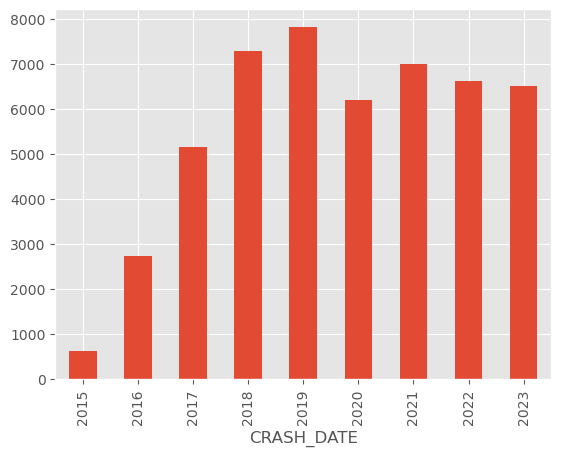

In [6]:
# when we ask for nrows are we getting a random sample?
df.groupby(df['CRASH_DATE'].dt.year).size().plot(kind='bar')

It's probably a good idea to see the year distribution for the whole dataset before making any decisions.

<Axes: ylabel='Frequency'>

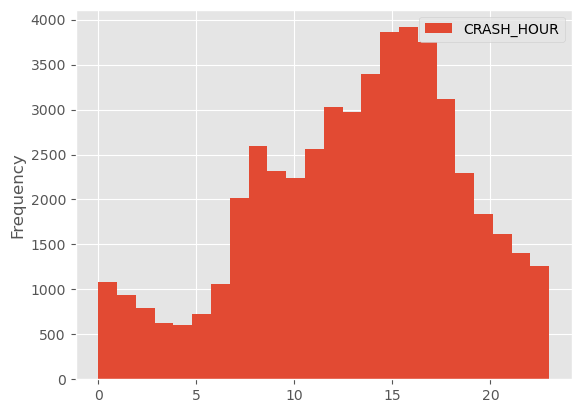

In [7]:
# crashes peak during rush hour
df[['CRASH_HOUR']].plot.hist(bins=24, legend=True)

<Axes: ylabel='Frequency'>

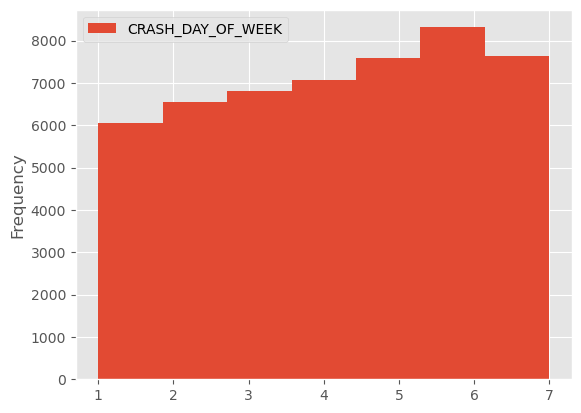

In [8]:
# going to guess 
df[['CRASH_DAY_OF_WEEK']].plot.hist(bins=7, legend=True)

<Axes: ylabel='Frequency'>

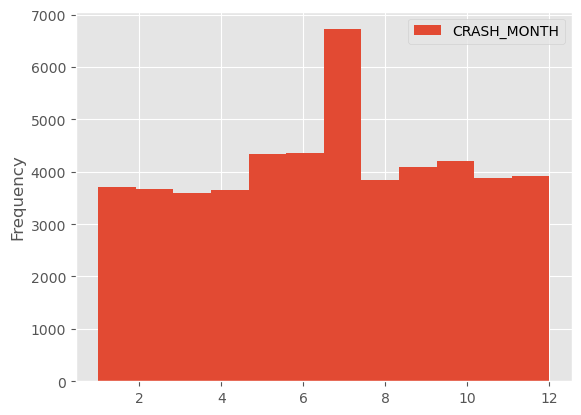

In [9]:
df[['CRASH_MONTH']].plot.hist(bins=12, legend=True)

<Axes: ylabel='INJURIES_TOTAL'>

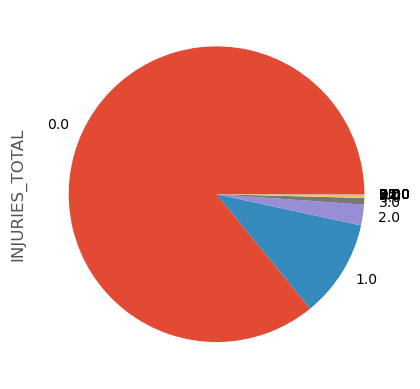

In [10]:
df['INJURIES_TOTAL'].value_counts().plot(kind='pie')

<Axes: ylabel='POSTED_SPEED_LIMIT'>

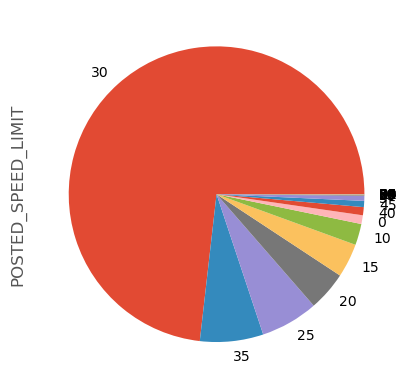

In [11]:
df['POSTED_SPEED_LIMIT'].value_counts().plot(kind='pie')

We have some outliers; are they sensible?

In [12]:
df[(df['POSTED_SPEED_LIMIT'] < 10) | (df['POSTED_SPEED_LIMIT'] > 55)]['POSTED_SPEED_LIMIT'].value_counts()

0     476
5     271
3       8
60      4
1       3
9       2
99      2
65      2
6       1
Name: POSTED_SPEED_LIMIT, dtype: int64

<Axes: ylabel='Frequency'>

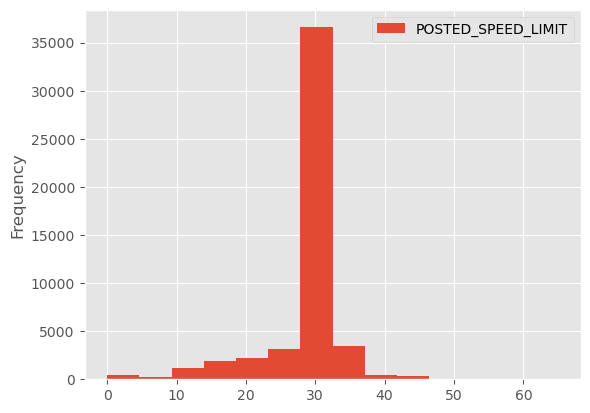

In [13]:
df[df['POSTED_SPEED_LIMIT'] < 66]['POSTED_SPEED_LIMIT'].plot.hist(bins=14, legend=True)

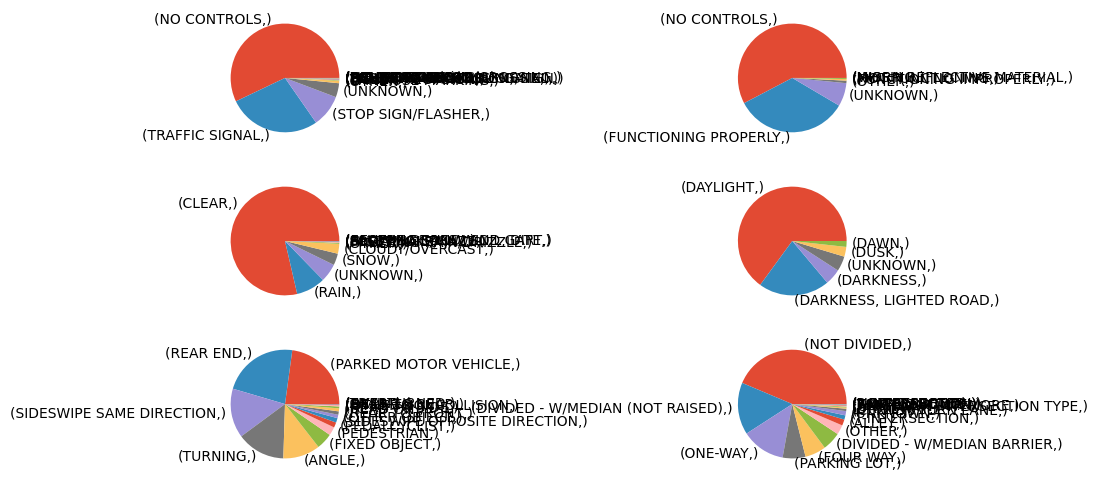

In [14]:
# let's make all of our ugly pie charts at once
from matplotlib.pyplot import subplots
pie_columns = [ 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE' , 'TRAFFICWAY_TYPE'	]

fig, ax = subplots(3, 2, figsize=(12, 6))
for index, axis in enumerate(ax.flatten()):
    df[[pie_columns[index]]].value_counts().plot(kind='pie', ax=axis, )

<Axes: >

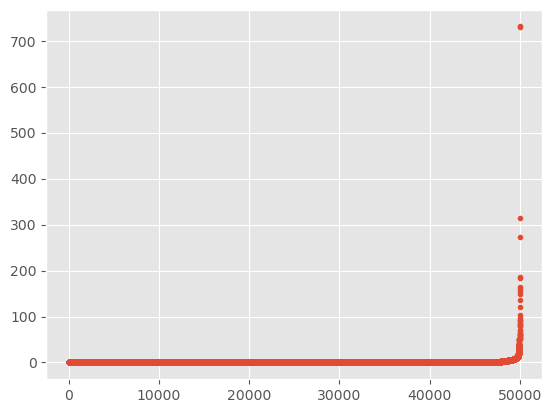

In [15]:
# most of the time but not always the time between the crash and the time it is reported is negligible
df['reporting_delay'] = (df['DATE_POLICE_NOTIFIED'] - df['CRASH_DATE']).dt.days
df[['reporting_delay']].sort_values(by='reporting_delay').reset_index()['reporting_delay'].plot(kind='line', linestyle='none', marker='.')

<Axes: xlabel='CRASH_DAY_OF_WEEK,CRASH_HOUR'>

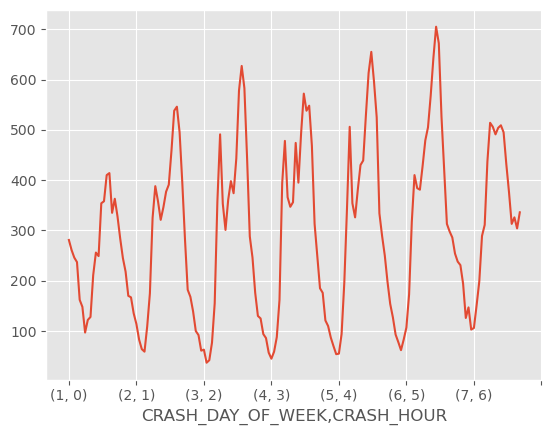

In [16]:
# day and hour chart
time_columns = ['CRASH_DAY_OF_WEEK', 'CRASH_HOUR'] 
df.groupby(by=time_columns).size().plot()

As expected crashes have rush hour modes during the week. Maybe a heatmap would be better.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='CRASH_HOUR', ylabel='CRASH_DAY_OF_WEEK'>

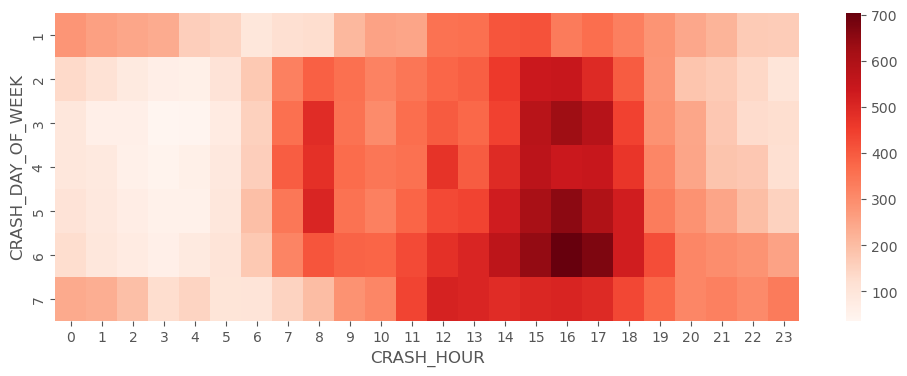

In [17]:
from seaborn import heatmap
from matplotlib.pyplot import figure
figure(figsize=(12, 4))
heatmap(data=df.groupby(by=time_columns).size().to_frame(name='count').reset_index().pivot(columns=time_columns[1],
                                                                                           index=time_columns[0],
                                                                                           values='count'),
       square=False, cmap='Reds')